In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from tqdm import tqdm

from scipy.stats import norm
from sklearn import preprocessing
from scipy.stats import norm
import statistics
from scipy.optimize import curve_fit

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')
# %matplotlib inline 
#makes plots fit the page

In [6]:
time = np.arange(0,800,0.2)


In [7]:
k_boz=1.3807 * 10**(-16) # k = 1.3807 × 10-16 cm2 g s-2 K-1
q_e=4.8032 * 10**(-10) # e = 4.8032 × 10-10 cm3/2 g1/2 s-1
temp=90
grid = 0.02
#mu=0.00694379
mu= 4.2 *10**4
k_boz*temp/(q_e*grid**2)

0.0646771943704197

In [8]:
D = mu*k_boz*temp/q_e
r=np.arange(-10,10,0.02)
t=0
print('calculate D is', D, 'simulated D is', 0.00833255)

calculate D is 1.086576865423051 simulated D is 0.00833255


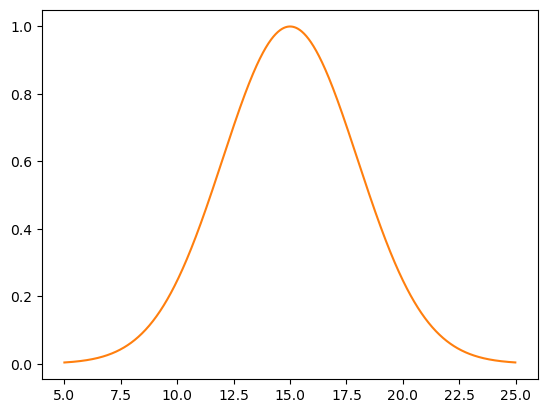

In [9]:
t=700*0.2
D=0.00833247
plt.plot(15 + r, np.exp(-r**2/(4*D*t)/np.sqrt(4*np.pi*D*t)),color='tab:orange')

In [31]:
directory_20m = '/Users/kevinhbhimani/Desktop/GPU_work/test/'
directory_10m = '/Users/kevinhbhimani/Desktop/GPU_work/test/'
i=1
imp_rad=15 #r location of impact
imp_height=5 #z location of impact
r_min=14.5
r_max=15.5

In [32]:
data_e_20m=np.loadtxt(directory_20m+ 'ed{:03d}.dat'.format(i))
data_h_20m=np.loadtxt(directory_20m+ 'hd{:03d}.dat'.format(i))
data_e_10m=np.loadtxt(directory_10m+ 'ed{:03d}.dat'.format(i))
data_h_10m=np.loadtxt(directory_10m+ 'hd{:03d}.dat'.format(i))

rad_e_20m=data_e_20m[:,0]
height_e_20m=data_e_20m[:,1]
dens_r_e_20m=data_e_20m[:,2]
rad_h_20m=data_h_20m[:,0]
height_h_20m=data_h_20m[:,1]
dens_r_h_20m=data_h_20m[:,2]

rad_e_10m=data_e_10m[:,0]
dens_r_e_10m=data_e_10m[:,2]
height_e_10m=data_e_10m[:,1]

rad_h_10m=data_h_10m[:,0]
dens_r_h_10m=data_h_10m[:,2]
height_h_10m=data_h_10m[:,1]


In [33]:
    diff_rad_e_20m = rad_e_20m[(dens_r_e_20m>0) & (height_e_20m==imp_height)]
    diff_den_r_e_20m = dens_r_e_20m[(dens_r_e_20m>0) & (rad_e_10m==imp_rad)]
    diff_h_e_20m = height_e_20m[(dens_r_e_20m>0) & (rad_e_20m==imp_rad)]


    diff_rad_h_20m = rad_h_20m[(dens_r_h_20m>0) & (height_h_20m==imp_height)]
    diff_den_r_h_20m = dens_r_h_20m[(dens_r_h_20m>0) & (rad_e_10m==imp_rad)]
    diff_h_h_20m = height_h_20m[(dens_r_h_20m>0) & (rad_h_20m==imp_rad)]


    diff_rad_e_10m = rad_e_10m[(dens_r_e_10m>0) & (height_e_10m==imp_height)]
    diff_den_r_e_10m = dens_r_e_10m[(dens_r_e_10m>0) & (rad_e_10m==imp_rad)]
    diff_h_e_10m = height_e_10m[(dens_r_e_10m>0) & (rad_e_10m==imp_rad)]

    diff_rad_h_10m = rad_h_10m[(dens_r_h_10m>0) & (height_h_10m==imp_height)]
    diff_den_r_h_10m = dens_r_h_10m[(dens_r_h_10m>0) & (rad_e_10m==imp_rad)]
    diff_h_h_10m = height_h_10m[(dens_r_h_10m>0) & (rad_h_10m==imp_rad)]


    norm_den_r_e_10m = diff_den_r_e_10m/np.max(diff_den_r_e_10m)
    norm_den_r_e_20m = diff_den_r_e_20m/np.max(diff_den_r_e_20m)

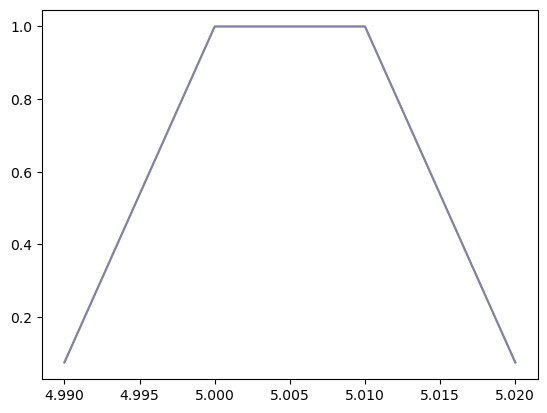

In [34]:
plt.plot(diff_h_e_10m, norm_den_r_e_10m, '-', color='tab:green', alpha=0.7)
plt.plot(diff_h_e_20m, norm_den_r_e_20m, '-', color='tab:purple', alpha=0.7)


In [12]:
def Norm(x, mu, sigma):
    #y = A*np.exp(-1*B*x**2)
    y=(1/(sigma*np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/(2*sigma**2))
    return y

def Gauss(x, a_gaus, b_gaus, c_gaus):
    y = a_gaus*np.exp(-(x-b_gaus)**2/(2*c_gaus**2))
    return y

In [12]:
radius = rad_e_20m[(dens_r_e_20m>0) & (height_e_20m==imp_height)]
frequency = dens_r_e_20m[(dens_r_e_20m>0) & (height_e_20m==imp_height)]/np.max(dens_r_e_20m[(dens_r_e_20m>0) & (height_e_20m==imp_height)])

# plt.hist(rad_e_20m, weights=dens_r_e_20m, bins=10000, ec='black',color='tab:blue')
#parameters, covariance = curve_fit(Norm, radius, frequency,  p0=[imp_rad,statistics.stdev(frequency)], check_finite='true')

parameters, covariance = curve_fit(Gauss, radius, frequency,  p0=[np.max(frequency),imp_rad,statistics.stdev(frequency)], check_finite='true')

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]

fit_y = Gauss(radius, fit_A, fit_B, fit_C)


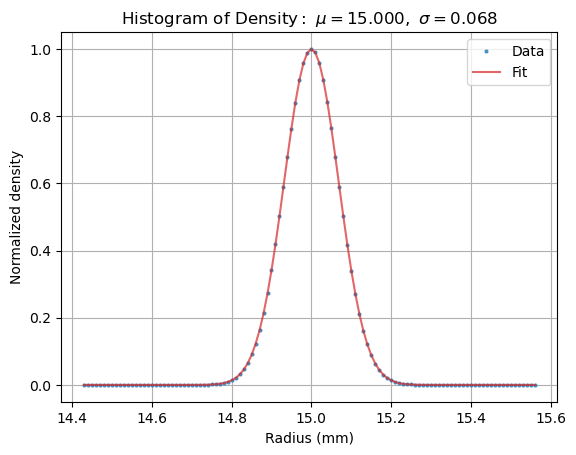

In [15]:
plt.plot(radius, frequency, 'o',markersize=2, color='tab:blue', alpha=0.7)
plt.plot(radius, fit_y, '-', color='tab:red', alpha=0.7)


plt.xlabel('Radius (mm)')
plt.ylabel('Normalized density')
plt.title(r'$\mathrm{Histogram\ of\ Density:}\ \mu=%.3f,\ \sigma=%.3f$' %(fit_B, fit_C))
plt.legend(['Data','Fit', 'Analytic solution'])

plt.grid(True)

plt.savefig('/Users/kevinhbhimani/Desktop/GPU_work/test/fit.png')